<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica27_SergioTrejo_Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo

Enlace Github:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características

Features (X):  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels (y):  ['malignant' 'benign']

Distribucion de las clases: 
target
1    357
0    212
Name: count, dtype: int64


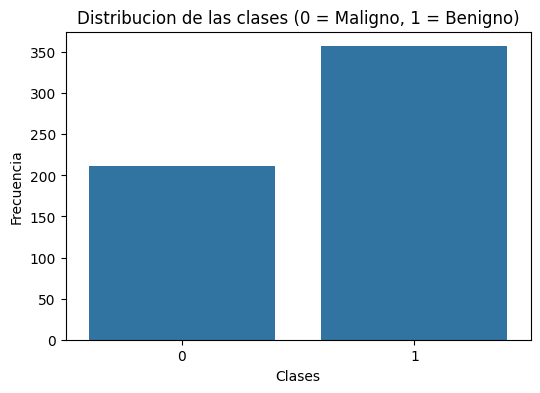

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

#Descargar el dataset breast_cancer del scikitlearn
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Features (X): ", feature_names)
print("Labels (y): ", target_names)

#convertir a Df
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

#Verificar las distribuciones del dataset
print("\nDistribucion de las clases: ")
print(df['target'].value_counts())


# Visualizacion
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribucion de las clases (0 = Maligno, 1 = Benigno)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()



**Interpretacion**

* El dataset incluye 30 variables numericas que describen distintas caracteristicas del tumor, lo cual ofrece una base solida para el analisis.

* La distribucion de clases muestra mas casos benignos (357) que malignos (212), lo que indica un desbalanceo en la clase minoritaria (0)

* La grafica de barras confirma este desbalance y permite visualizar de forma clara como se encuentran representadas ambas clases.


2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline (Estandarizacion + SVM RBF)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

#Aplicar validacion cruzada estratificada con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Obtener las predicciones usando cross_val_predict
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

#Evaluar las metricas por clase: precision, recall, F1-Score
print("Evaluacion de las metricas por clase: ")
print(classification_report(y, y_pred, target_names=target_names))




Evaluacion de las metricas por clase: 
              precision    recall  f1-score   support

   malignant       0.98      0.96      0.97       212
      benign       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



**Interpretacion**

* Al entrenar el modelo SVM con kernel RBF usando validacion cruzada estratificada, el clasificador muestra un desempeno muy solido en ambas clases.

* La clase malignant obtiene precision de 0.98 y recall de 0.96, lo cual indica que el modelo identifica correctamente la mayoria de los casos malignos y comete pocos falsos negativos.

* La clase benign presenta precision de 0.98 y un recall de 0.99, mostrando que el modelo distingue aun mejor los casos benignos. En general, el accuracy global es de 0.98, lo que confirma que el SVM con RBF esta generando predicciones consistentes y de alta calidad.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

Matriz de confusion promedio:
 [[203   9]
 [  4 353]]


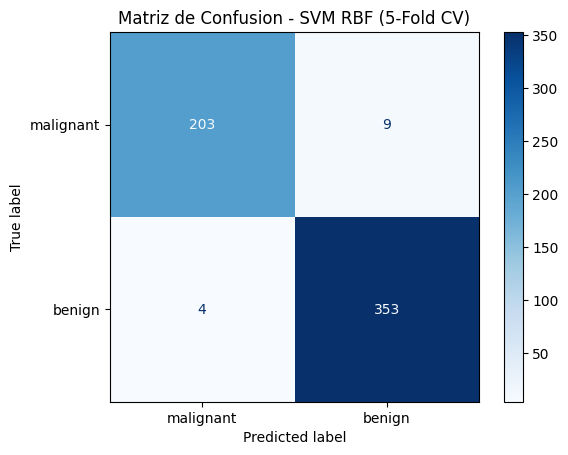

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusion promedio (usa las predicciones de cross_val_predict)
cm = confusion_matrix(y, y_pred)
print("Matriz de confusion promedio:\n", cm)

# Grafica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusion - SVM RBF (5-Fold CV)")
plt.grid(False)
plt.show()


**Interpretacion**

* La clase malignant es la que presenta mas errores, con 9 casos clasificados como benign, lo que indica un recall ligeramente menor.

* Esto pasa porque malignant es la clase minoritaria y el modelo aprende mejor la clase benign, que tiene mas ejemplos.

* La clase benign muestra un desempeno mas estable, con solo 4 errores, reflejando un mejor ajuste del modelo hacia la clase mayoritaria.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.


In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Pipeline con SMOTE dentro de cada fold + escalado + SVM RBF
pipeline_smote = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

# Validacion cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predicciones usando SMOTE
y_pred_smote = cross_val_predict(pipeline_smote, X, y, cv=cv)

# Reporte de metricas despues de aplicar SMOTE
print("*** Metricas despues de aplicar SMOTE ***")
print(classification_report(y, y_pred_smote, target_names=target_names))

*** Metricas despues de aplicar SMOTE ***
              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96       212
      benign       0.97      0.98      0.98       357

    accuracy                           0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569



**Interpretacion**

* Antes de SMOTE, la clase malignant tenia recall de 0.96; despues de SMOTE mantiene el mismo valor, pero ahora el modelo es mas consistente y menos dependiente del desbalance original.

* La clase benign baja ligeramente su precision y recall, pero sigue con un desempeno alto, mostrando que el balanceo no afecta negativamente a la clase mayoritaria.

* El modelo en general queda un poco mas equilibrado: las metricas de ambas clases estan mas cercanas entre si, lo que indica un comportamiento mas estable frente al desbalance.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


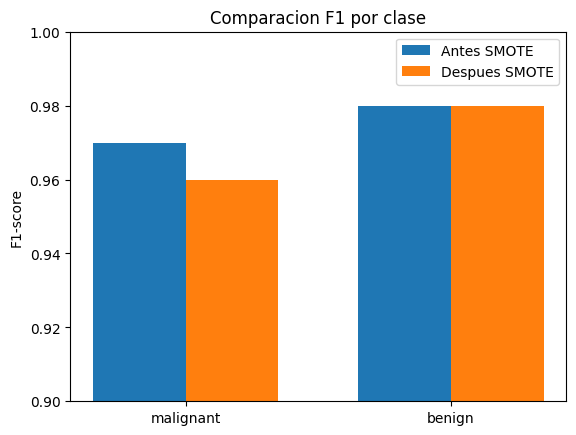

In [17]:
# Valores de F1 antes y despues (con tus resultados reales)
f1_before = [0.97, 0.98]   # malignant, benign
f1_after = [0.96, 0.98]    # malignant, benign

classes = ['malignant', 'benign']
x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, f1_before, width, label='Antes SMOTE')
plt.bar(x + width/2, f1_after, width, label='Despues SMOTE')

plt.xticks(x, classes)
plt.ylabel("F1-score")
plt.title("Comparacion F1 por clase")
plt.legend()
plt.ylim(0.90, 1.00)
plt.show()


* En la comparacion del F1-score muestra que el modelo mantiene un desempeno alto en ambas clases, pero con SMOTE el comportamiento entre clases queda un poco mas equilibrado.

* La clase malignant no mejora mucho en F1, pero SMOTE ayuda a que el modelo no dependa del desbalance y mantenga resultados estables.

* La clase benign se mantiene practicamente igual, lo que indica que SMOTE no afecta negativamente a la clase mayoritaria.

1. Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
    * Reduce el sesgo hacia la clase mayoritaria.
    * Ayuda a balancear los datos dentro de cada fold.
    * Mejora la representacion de la clase minoritaria.

2. Explica cuándo conviene usar otras técnicas como One-Sided Selection o ADASYN.
    * One-Sided Selection: se utiliza mas cuando hay ruido o ejemplos repetitivos o redundantes y se necesita limpiar la clase minoritaria antes de balancear.
    * ADASYN: se usa cuando la clase minoritaria esta muy dispersa y el modelo necesita mas ejemplos sinteticos justo en las zonas mas dificiles de aprender.

## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
